# **07. Introduction to Python Visualization Libraries**

Welcome to our <font color=#f2cc38>**Seventh Content Block**</font> in the Python Course! 

After having dealt with different content blocks throughout the weeks, we will during the next couple modules, put the cherry on top to our Python training by means of introducing some Machine Learning fundamentals in Python. Throughout this introduction, our library of reference will mostly be **sci-kit learn**, which counts on a set of inherent models, functionalities for data engineering, error metrics, etc., worth checking.

Throughout this class, we will:

- Use the dataset functinalities of sklearn
- Explore a reference dataset
- Do a first iteration of doing feature engineering, by:
    - Dropping unwanted variables
    - Dealing with null values
- Do a first iteration to training a model, by:
    - Choosing a simple Regression Model
    - Randomly splitting our dataset
    - Evaluating its performance with core evaluation metrics
- Perform some feature engineering:
    - We'll speak about how to deal with null values more effectively.
    - We'll speak about the normalization of values.
    - We'll introduce the Pipeline function, to code several transformations together.
- We'll fit again the same model as before, and try to fit other different ones, and compare their performances.

## **01. Introduction to SKLearn**

Firstly, let's take a look at sklearn core functionalities.

Unlike other libraries like pandas, it is not common practice to import the whole of sklearn. In fact, we tend to import it module by module. For instance, if we need a LinearRegression model, we would import it specifically, so as not to import the totality of models that sklearn considers.

Let's first start by importing some data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [5]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

We can see that sklearn brings several datasets set for model exploration. However, they all seem to have been pretreated effecively thus far. In this regard, for instance, the diabetes dataset seems to have already undergone a process of standardization or normalization (more on that later), and is already splitted.

As our aim is to treat a dataframe from the very beginning, for that we will import a new dataframe from a csv, and do all necessary exploration ourselves.

However, bear in mind all existing capabilities as for dataset import that sklearn also presents.

In [6]:
df = pd.read_csv('data/USA_Housing-mod.csv')

## **2. EDA: Dataset Exploration**

Let's explore our original dataset, by means of using panda's basic exploratory functions, as well as added visualization functions.



In [94]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
1026,86031.512747,5.293498,7.372990,5.16,35417.769647,1.381417e+06,"519 David Ways Apt. 059\nPort John, PW 73151-6724"
4407,61828.032561,7.129286,7.035451,6.24,43068.228806,1.377430e+06,03619 Martin Groves Apt. 807\nSouth Jennifersh...
295,75179.902990,4.595921,7.201636,5.13,23978.093305,9.355908e+05,"38138 Carter Shores\nLake Felicia, OK 96739-7550"
358,55577.071754,6.533916,7.162536,3.47,19560.012414,8.180579e+05,"931 Bradley Locks Apt. 730\nJustinborough, KY ..."
4368,64455.779102,6.152456,NaN,6.14,29066.217806,1.095728e+06,Unit 3025 Box 1270\nDPO AP 46231-3142


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4750 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [96]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987855,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.009099,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.301498,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.670756,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


 - We see that there are some null values that will be needed to be taken care of.
 - We see that there's a non-numerical variable that just points to the address of the house per se. It does not provide a clear value per see - it is not a categorical variable, or a numerical one. Therefore, we will just drop it for our analysis. However, in another cirsumstance we could use it in feature extraction - for instance, passing each address through a geolocator that may lead us to finding its latitude and longitude, or city to which it belongs, which may further help us in our predictions.
 - Plus, we see that, apart from address, there are just numerical values to consider - no categorical ones. Great, as we will not need to deal with OHE or nothing similar.

Now, let's check the correlation of all variables among each other:

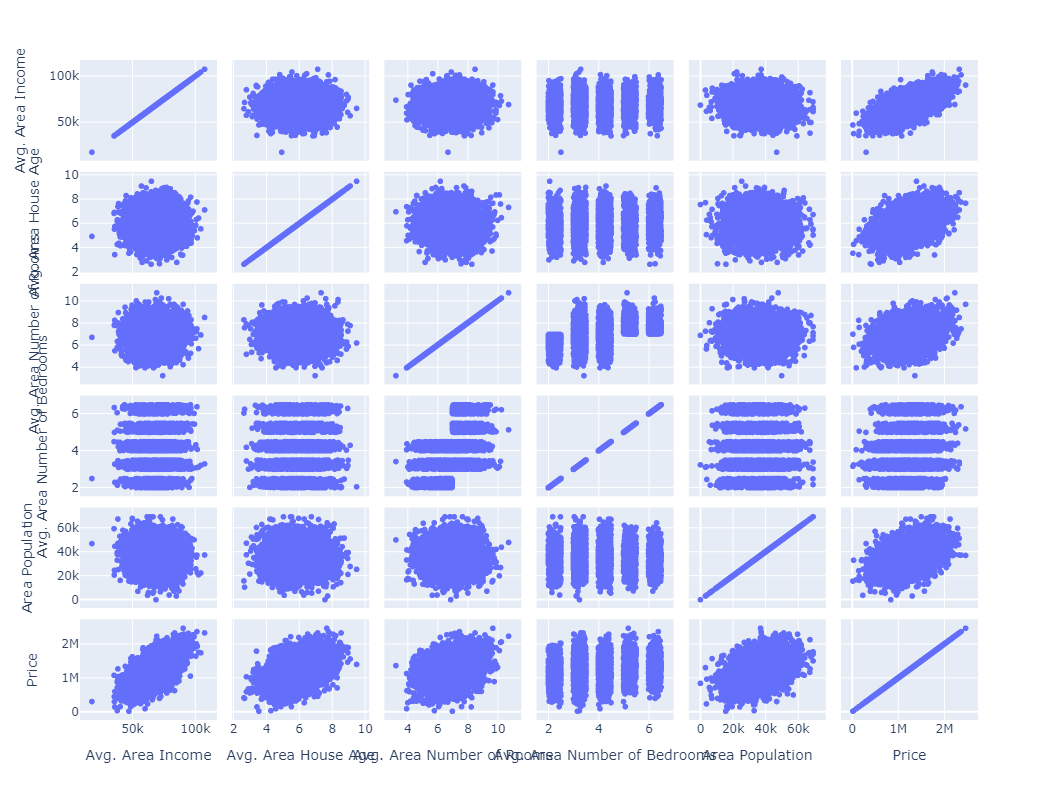

In [111]:
px.scatter_matrix(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population', 'Price']],
                 width=800, height=800)

/tmp/ipykernel_265/3620625429.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



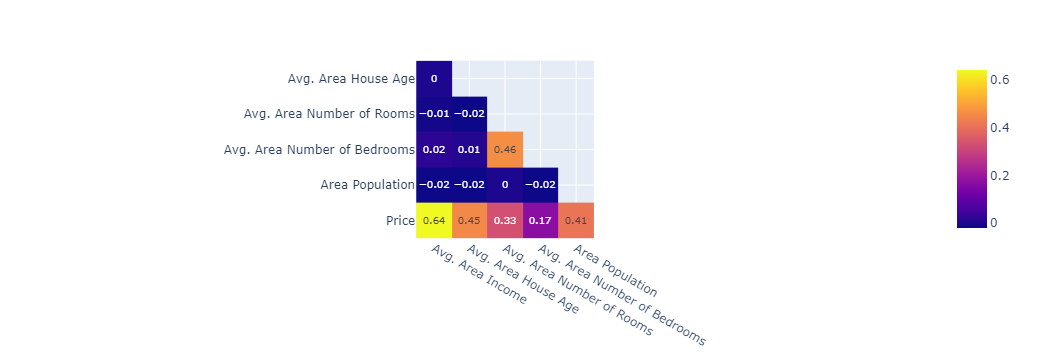

In [113]:
# Correlation
df_corr = df.corr(numeric_only = True).round(2)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna('columns', how='all')
fig = px.imshow(df_corr_viz, text_auto=True)
fig.show()

There doesn't seem to be either a super strong correlation between any of the predicting variables. At most, number of rooms and number of bedrooms seem to be somewhat correlated. however, their correlation is not strong (it is not > 0.7), therefore so far we don't need to necessarily drop it. It could be an option, though, to see if it yields a higher performance.

## **2. First iteration of Feature Engineering**

Let's do a  first, rudimentary Feautre Engineering stage by:

 - Drop the dimensions that we already know we are not going to use for the training of the model, namely the Address.
 - Deal with null values rudimentarily, by transforming them all to 0. This is not the appropriate way of dealing with null values, but we will get to see the impact of it.

In [16]:
# drop the unwanted dimensions
df1 = df.copy()
df1.drop('Address', axis = 1, inplace = True)

In [17]:
# deal with null values
df1.fillna(0, inplace = True)

## **3. First Iteration of Running a Model**

Now we are going to do a first iteration of running a model by means of importing some necessary packages from sklearn. We need to:

 - Randomly split our dataset.
 - Import a model, fit it and get predictions and its performance based on our target evaluation metric.

In [138]:
# import the necessary module for splitting
from sklearn.model_selection import train_test_split

In [140]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [141]:
# split our dataset randomly
X = df1.drop('Price', axis = 1)
y = df1['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Let's see what we obtained

In [142]:
X_train[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3413,69048.788093,6.619712,6.123813,4.33,36817.368760
1610,67866.899929,5.393978,9.359022,5.44,43122.574176
3459,56636.238191,5.497667,7.121872,6.10,47541.431763
4293,79310.361977,4.247434,7.518204,4.38,43982.188957
1039,72821.247664,6.480819,7.116655,5.33,40594.059297


In [143]:
X_test[:5]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,0.000000,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049


In [144]:
# We see the desired ration 4:1
print(len(X_train), len(X_test))

4000 1000


Now that we have effectively splitted our dataset, let's import first a simple model - for instance, **Linear Regression**.

In [145]:
# Import a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [146]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [151]:
# prepare predictions
y_pred = model.predict(X_test)

In [154]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE: 106912.57857561017
MSE: 18928386387.18381
RMSE: 137580.47240500306

MAPE: 0.10121782675247969


MAPE of **10%**! Quite high, I'm sure we can still bring it down a bit.

- As for error metrics, the MAPE is a metric that is more easily understandable business-wise. However, bear in mind that it does not penalize outlier values in the way that the RMSE does.

Plus, for linear regression, we can also get the importance of our variables "relatively easy":

In [156]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.471185
Avg. Area House Age,163216.896229
Avg. Area Number of Rooms,29251.684198
Avg. Area Number of Bedrooms,37005.990060
Area Population,15.630163


However, this interpretation is not actually that true! To get to interpret the coefficients of the Regression model after fitting as the importance of the variables, we need to aply some **Standarization** to them, which we have not done so far!

## **4. Second Iteration of Feature Engineering**

We have seen that there's much left still to be improved as for our predictions. Some areas of improvement may consider:

- Dealing with null values effectively
- Training with more data
- Suppressing irrelevant features
- Expanding the number of features, even by feature extraction
- Using methodologies of Standardization or Normalization.

There are some of these alternatives that do not apply to our use case. In the end, we are dealing with a very simplified example problem. However, we will apply some of them.

### **Dealing with null values effectively**

The way that we dealt with null values was very rudimentary. In the end, we regularized them all to 0, which affects the distribution of data. Some ways of handling them more correctly include using the mean value of the dimension, or the median. 

- If we had specific categories, for instance city or neighbourhood, we could even go to that level of granularity at the time of calculating the mean or median value, and filling our null values.

Let's see to it:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4750 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [25]:
df2 = df.drop('Address', axis = 1).copy()

In [26]:
df2['Avg. Area Number of Rooms'].fillna(df2['Avg. Area Number of Rooms'].mean(), inplace = True)

By comparing it with the changes enacted upon df1, we can see that the mean was changed significatively

In [27]:
print(df1['Avg. Area Number of Rooms'].mean(), df2['Avg. Area Number of Rooms'].mean())

6.638462023771662 6.9878547618649085


<AxesSubplot:>

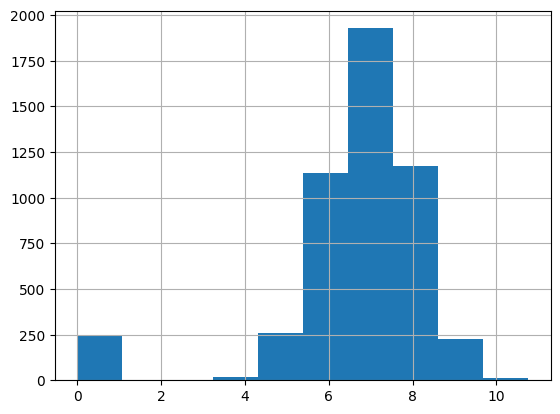

In [28]:
df1['Avg. Area Number of Rooms'].hist()

<AxesSubplot:>

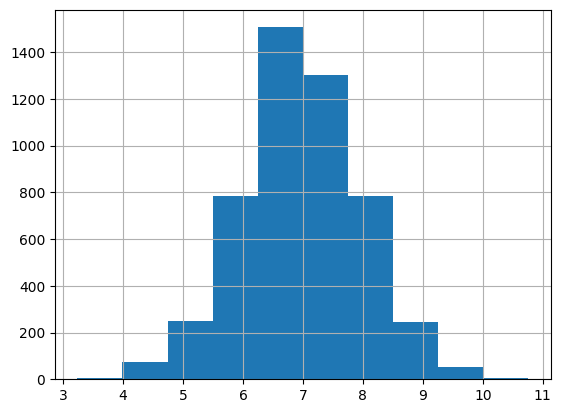

In [29]:
df2['Avg. Area Number of Rooms'].hist()

### **Using methodologies of Standardization or Normalization**

What do we mean when we speak about Standardization and Normalization?

There are several models which way of functioning depends on the magnitude of the variables used. A nice example are clustering models, which are distance-based models which we have relatively introduced so far. They are based on separating datapoints in a N-dimensional cartesian space according to the number of N variables used. In this circumstance, these models become increasingly dependant on the magnitude of each variable. For instance, if we are inputting height and weight of an animal in order to cluster them according to different species, a change in the height of 2m to 3m will be 2 orders of magnitude lower than the change from 200kg to 300kg, and these changes in variables may equal in importance.

Techniques like standardization and normalization take into account the total numeric range of each variable, and regularize their absolute values so as to represent a "normalized" scale, rendering all dimensions comparable between each other. There are some techniques of achieving this. Some main ones include:

 - Normalization simply normalizes the data in the dimension, scaling all values between 0 and 1, or 1 and -1.
 - Standardization modifies data so that it has a mean of 0 and a standard deviation of 1. This way, lacking a specific restricted range like normalization does, standardization is less affected by outliers.
 
We will be using standardization in order to regularize all our data.

You can find more information about this here: https://builtin.com/data-science/when-and-why-standardize-your-data.

In [30]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [31]:
from sklearn.model_selection import train_test_split
# split our dataset randomly
X = df2.drop('Price', axis = 1)
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

We need to first split our dataset randomly, given that the standard scaler needs to be **fitted** in the data. We **cannot** fit the scaler into the part that we are going to use to evaluate the performance of the model i.e., our test dataset, or else information of our testing set will **leak** to the training process of the model. 

Therefore, our later evaluation of the model in the training set will not be as if it had never seen that data, and it can perform much better than when we deploy it later in real life.

In [33]:
# declare our scaler
sc = StandardScaler()
# fit and transform our training set
X_train = sc.fit_transform(X_train)
# just transform our test set with the standard scaler object that has already been fitted!
X_test = sc.transform(X_test)

In [38]:
# the output is a numpy array, with the modified dimensions of the inputted dataframe!
X_train[:5]

array([[ 0.05569623,  0.65886183, -0.88547953,  0.29911519,  0.06391981],
       [-0.05545523, -0.58559522,  2.43455412,  1.2000951 ,  0.69883088],
       [-1.11165023, -0.48032202,  0.13874766,  1.73581289,  1.14379364],
       [ 1.02075272, -1.74965237,  0.54547144,  0.33969987,  0.78539094],
       [ 0.41047968,  0.51784767,  0.1333939 ,  1.11080881,  0.4442187 ]])

### **The Pipeline object as the most appropriate way of running transformations**

So far we have been performing all parts of the transformation process of the dataset in separate steps.

However, there is a better way to do so, namely by the use of sklearn's **Pipeline** object. The Pipeline object lets us centralize all wanted changes as part of the pipeline. This is a best practice, it's much more centralized and easier to read.

Let's see how to implement it.

In [45]:
from sklearn.compose import ColumnTransformer # applies transformers to specific columns at a time
from sklearn.impute import SimpleImputer # this is a sklearn object to simply fill null values
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [68]:
# define the pipeline
pipeline = Pipeline([
    ('fill_na', SimpleImputer(strategy='mean')),  # Use SimpleImputer for filling null values with mean
    ('scale', StandardScaler()),  # Apply StandardScaler to all columns
])

In [69]:
# make a copy of the dataframe
df3 = df.drop('Address', axis = 1).copy()
# train-test split - we need to fit the pipeline just on the X_train, so we need to split before applying it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# fit the pipeline on the training data, and transform it
X_train = pipeline.fit_transform(X_train)
# transform test data consonantly
X_test = pipeline.transform(X_test)

## **5. Second Iteration of the Modelling process**

Now that we have transformed the data throughout the whole pipeline, let'strain the same model as before with the new data, so as to see its performance.


### **Retraining the Linear Regression model**

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [74]:
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAE: 82711.45224018671
MSE: 10714063718.033848
RMSE: 103508.76155202441

MAPE: 0.076326345274517


We can see how by applying just these couple of transformations we have been able to bring MAPE down to a **7.6%**!

Plus, now our variable importances are really comparable:

In [77]:
pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Area Income,231839.823845
Avg. Area House Age,164165.381331
Avg. Area Number of Rooms,116507.823010
Avg. Area Number of Bedrooms,6415.746918
Area Population,151993.536755


See how the priority changed vs before! It looks like Avg Area Income is the most important variable, when actually before it wasn't! That's what Scaling does!

### **Using other models**

As we discussed in the beginning of the session, with our presentation, according to the dataset at hand it may be benefitial to use more complex models than just a plain Linear Regression. Other models of higher complexity for regression include Lasso Regression, Ridge Regression, RandomForestRegressor, XGBRegressor, etc.

Without needing to explain their base fundamentals, we will try out some of them out, and see how they perform.

In [80]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
model1 = Ridge(alpha = 1.0)
model2 = Lasso(alpha=0.1)
model3 = RandomForestRegressor(random_state=42)

In [81]:
def output_model_results(models):
    for i, model in enumerate(models):
        print(['Ridge', 'Lasso', 'Random Forest'][i])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
        print('MSE:', metrics.mean_squared_error(y_test, y_pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))
        print('----------------------------------')

In [82]:
output_model_results([model1, model2, model3])

Ridge
MAE: 82711.20274044652
MSE: 10714465969.8606
RMSE: 103510.70461483972
MAPE: 0.07633145539863755
----------------------------------
Lasso
MAE: 82711.44776872834
MSE: 10714062848.86185
RMSE: 103508.75735348121
MAPE: 0.07632635325268193
----------------------------------
Random Forest
MAE: 96469.67896087456
MSE: 15021677797.603855
RMSE: 122562.95442589435
MAPE: 0.09092743556937845
----------------------------------


Of course, you could present results much ore beautifully than I did before with a pandas dataframe.

Several things to comment here:

- First, Random Forest, despite being the more complex model, does not get greater accuracy than the others. That might be due to the fact that **Tree-based models DO NOT take in Standardized dimensions** - for Lasso and RIdge is actually a must, but not for any model like Random Forests, XGB, etc.
- All the new models that we studied take into account **Hyperparameters**, which Linear Regression does not. As such, there might be a configuration of these hyperparameters that generates a best predicting result of the model (here's where the Validation dataset and Cross Validation (CV) that we dscussed before come into play). That means that **hyperparameter tuning** is also a key process of the Machine Learning project flow. There are several libraries that can help you in that process, such as the japanese **Optuna** library.
- Plus, there are also other libraries that can be used in order to plot, for different metrics, which is the best performing kind of model.

## **ANNEX: Modification of dataframe**

Let's induce some null values in some of its columns, for convenience purposes of our previous exercises.

In [87]:
# Function to add null values to a percentage of data in specified columns
def add_null_values(df, columns, percentage):
    for column in columns:
        # Determine the number of null values to add
        num_nulls = int(len(df) * percentage/100)
        
        # Randomly select indices to set as null values
        null_indices = np.random.choice(df.index, num_nulls, replace=False)
        
        # Set the selected indices in the specified column to NaN
        df.loc[null_indices, column] = np.nan
    
    return df

# Specify columns and percentage of null values to introduce
columns_to_introduce_nulls = ['Column1', 'Column3']
percentage_of_nulls = 5

# Add null values to the specified columns
df_with_nulls = add_null_values(df, columns_to_introduce_nulls, percentage_of_nulls)

In [88]:
df = pd.read_csv('data/USA_Housing.csv')

In [89]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [90]:
df_mod = add_null_values(df, columns = ['Avg. Area Number of Rooms'], percentage = 5)

In [91]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4750 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [92]:
df_mod.to_csv('data/USA_Housing-mod.csv', index = False)